In [2]:
import importlib
import findstars
import cleanstars
import numpy as np
importlib.reload(findstars)
importlib.reload(cleanstars)
findstars.TICStar.load()

import matplotlib.pyplot as plt
np.set_printoptions(suppress = True)

In [ ]:
# Results of cleaning
for tic in findstars.TICStar._downloaded_stars():
    star = findstars.TICStar._stars[tic]
    data = cleanstars.get_star_data(star)
    clean = cleanstars._process_nan(data)
    downscale = cleanstars._downscale(clean, 2000)
    normalized = cleanstars._normalize(downscale)
    cleanstars._plot_approximate_lightcurve(normalized, tic)

Removed 314 frames.


C:\Users\josep\Google Drive\CS\Academic\Exoplanet Research\cleanstars.py:107: RuntimeWarning: Mean of empty slice
  averaged.append(np.nan_to_num(np.nanmean(subarray, axis=0)))


(0.0, 2000.0)

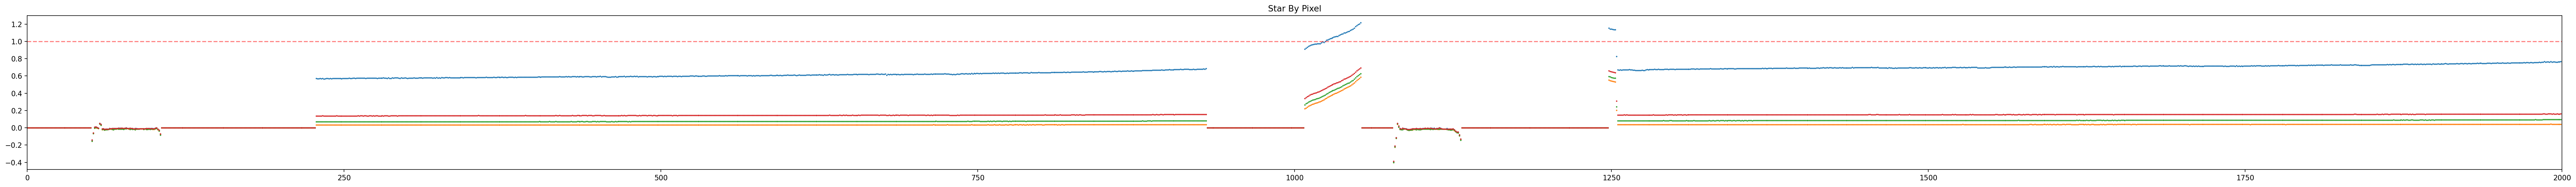

In [3]:
# Brightness of star by pixel

star = findstars.TICStar._stars[111991770]
data = cleanstars.get_star_data(star)
clean = cleanstars._process_nan(data)
downscale = cleanstars._downscale(clean, 2000)
normalized = cleanstars._normalize(downscale)

fig = plt.figure(dpi=160, figsize=(64, 4))
ax = fig.add_subplot(1, 1, 1)
x, y1, y2, y3, y4 = [], [], [], [], []
count = 0
sl1, sl2 = len(normalized[0]) // 2, len(normalized[0][0]) // 2
for frame in normalized:
    x.append(count)
    count += 1
    #mx = np.max(frame[sl1 - 1:sl1 + 2, sl2 - 1:sl2 + 2])
    y1.append(frame[sl1][sl2])
    y2.append(frame[sl1 + 1][sl2 + 1])
    y3.append(frame[sl1 + 1][sl2])
    y4.append(frame[sl1][sl2 + 1])
ax.scatter(x, y1, s=1)
ax.scatter(x, y2, s=1)
ax.scatter(x, y3, s=1)
ax.scatter(x, y4, s=1)
ax.plot([0, len(normalized)], [1, 1], ls="--", c="r", alpha=0.5)
ax.set_title("Star By Pixel")
ax.set_xlim(0, len(normalized))

[243185500, 1]
[139470481, 0]


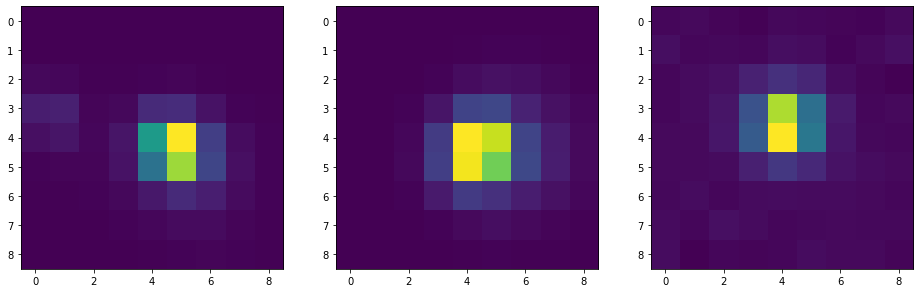

In [25]:
#Plot star picture
import os
import lightkurve as lk
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

#Load data
f = open("res/dataset.csv")
raw = f.readlines()
f.close()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))

line = raw[3]
line = [int(s.strip()) for s in line.split()]
print(line)
data = np.load(os.path.expanduser("~/.lightkurve-cache/mastDownload/TESS_processed/") + str(line[0]) + ".npy")
ax1.imshow(data[0])
ax1.set_title("Planet candidate")

line = raw[700]
line = [int(s.strip()) for s in line.split()]
print(line)
data = np.load(os.path.expanduser("~/.lightkurve-cache/mastDownload/TESS_processed/") + str(line[0]) + ".npy")
ax2.imshow(data[0])
ax1.set_title("Non-candidate")

data = np.load(os.path.expanduser("~/.lightkurve-cache/mastDownload/TESS_processed/10005.npy"))
ax3.imshow(data[0])
ax1.set_title("Simulated star")

fig.save("res/star_img")

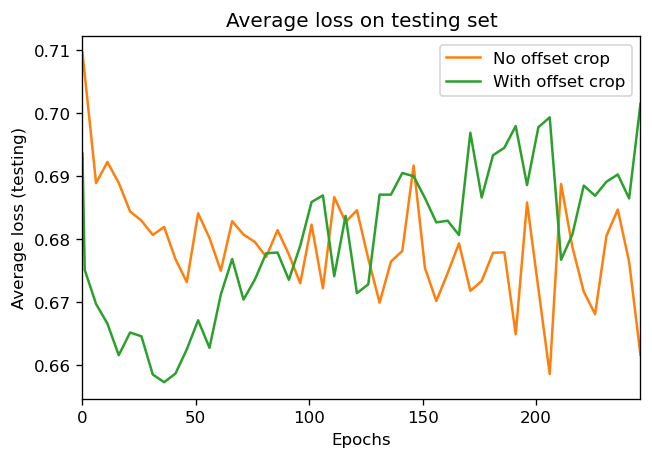

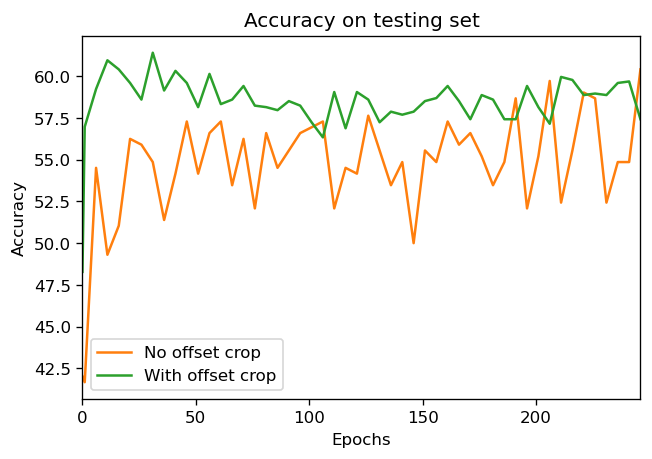

In [17]:
#Accuracy/loss graph
import matplotlib.pyplot as plt
import numpy as np

#Total correct, total testing, accuracy %, total loss, average loss
nocut = np.load("res/training_results_1cut_new.npy")[0]
cut = np.load("res/training_results_0cut_new.npy")[0]
epochs = [0] + list(range(1, nocut.size - 5, 5))


plt.figure(dpi=120)
plt.title("Average loss on testing set")
plt.xlabel("Epochs")
plt.ylabel("Average loss (testing)")
plt.xlim(0, epochs[-1])
plt.plot(epochs, [i[4] for i in nocut], "C1", label='No offset crop')
plt.plot(epochs, [i[4] for i in cut], "C2", label='With offset crop')
plt.legend()
plt.savefig("res/plots/testing_set_comp_loss")
plt.show()

plt.figure(dpi=120)
plt.title("Accuracy on testing set")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0, epochs[-1])
plt.plot(epochs, [i[2] * 100 for i in nocut], "C1", label='No offset crop')
plt.plot(epochs, [i[2] * 100 for i in cut], "C2", label='With offset crop')
plt.legend()
plt.savefig("res/plots/testing_set_comp_acc")
plt.show()